In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
df= pd. read_csv("churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3547,1568-BEKZM,Male,1,Yes,No,70,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),90.05,6333.4,No
636,7954-MLBUN,Male,0,No,No,31,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),99.45,3109.9,No
1617,4939-KYYPY,Male,0,No,No,27,Yes,Yes,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Electronic check,59.45,1611.65,No
3914,1755-FZQEC,Male,0,No,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.90,791.15,No
6599,0023-XUOPT,Female,0,Yes,No,13,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,No,Electronic check,94.10,1215.6,Yes


In [7]:
df.drop('customerID', axis = 'columns', inplace = True)

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
df. MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [12]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [13]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [14]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull() ]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
df.shape

(7043, 20)

In [18]:
df1= df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [19]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [21]:
df1.TotalCharges= pd.to_numeric(df1.TotalCharges)

c:\users\santosh botcha\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [23]:
df1.TotalCharges.dtypes

dtype('float64')

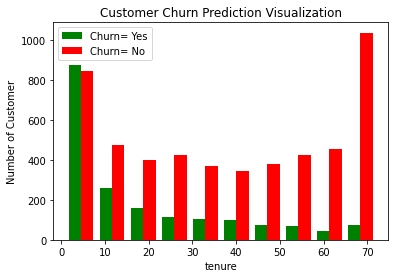

In [32]:
tenure_churn_no= df1[df1.Churn == 'No'].tenure
tenure_churn_Yes= df1[df1.Churn == 'Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number of Customer")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_Yes,tenure_churn_no], color= ['green','red'],label =['Churn= Yes', 'Churn= No'] )
plt.legend()

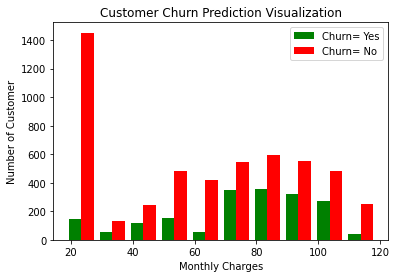

In [33]:
mc_churn_no= df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_Yes= df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customer")
plt.title("Customer Churn Prediction Visualization")

plt.hist([mc_churn_Yes,mc_churn_no], color= ['green','red'],label =['Churn= Yes', 'Churn= No'] )
plt.legend()

In [36]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes =='object':
            print(f'{column} : {df[column].unique()}')

In [44]:
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [40]:
df1.replace('No internet service','No',inplace= True)
df1.replace('No phone service','No',inplace= True)

In [42]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [46]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines', 'OnlineSecurity','OnlineBackup','DeviceProtection',
                 'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn' ]


In [50]:
 for col in yes_no_columns:
        df1[col].replace({'Yes': 1,'No': 0},inplace =True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [52]:
for col in df1:
            print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [55]:
df1['gender'].replace({'Female': 1, 'Male': 0}, inplace =True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [56]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [57]:
df2 =pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [59]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1833,0,0,0,0,1,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
485,0,0,1,1,72,1,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3912,1,0,1,1,60,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0
106,1,0,1,1,72,1,1,1,1,0,...,0,1,0,0,1,0,0,0,1,0
3750,1,1,1,0,12,1,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0


In [60]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [63]:
cols_to_scale = ['tenure', 'MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [64]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2705,1,0,1,0,1.000000,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
5377,0,0,0,0,0.042254,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5968,1,0,0,0,0.154930,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
5845,1,0,0,0,0.028169,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5903,0,0,1,0,0.718310,1,1,1,0,1,...,0,1,0,0,0,1,0,1,0,0


In [65]:
X = df2.drop('Churn', axis= 'columns')
Y = df2 ['Churn']

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state =5)

In [67]:
X_train.shape

(5625, 26)

In [68]:
X_test.shape

(1407, 26)

In [74]:
import tensorflow as tf
from tensorflow import keras

model =keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,),activation ='relu'),
     keras.layers.Dense(6, input_shape=(26,),activation ='relu'),
    keras.layers.Dense(1, activation ='sigmoid'),
])

model.compile(optimizer='adam',
             loss= 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, Y_train, epochs =100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5271 - accuracy: 0.7365
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4337 - accuracy: 0.7924
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4217 - accuracy: 0.7980
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4179 - accuracy: 0.8011
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8032
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4140 - accuracy: 0.8062
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.8041
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.8076
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4085 - accuracy: 0.8062
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4075 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3793 - accuracy: 0.8228
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3799 - accuracy: 0.8208
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3782 - accuracy: 0.8258
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3779 - accuracy: 0.8272
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3777 - accuracy: 0.8260
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3779 - accuracy: 0.8242
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3779 - accuracy: 0.8245
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3758 - accuracy: 0.8258
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.8252
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 

In [76]:
model.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.7896


[0.45913976430892944, 0.7896233201026917]

In [77]:
yp = model.predict(X_test)
yp[:5]

array([[0.34262687],
       [0.39774632],
       [0.0067504 ],
       [0.72781277],
       [0.3938864 ]], dtype=float32)

In [81]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [83]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [84]:
Y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [86]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       999
           1       0.68      0.53      0.59       408

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(69.0, 0.5, 'Truth')

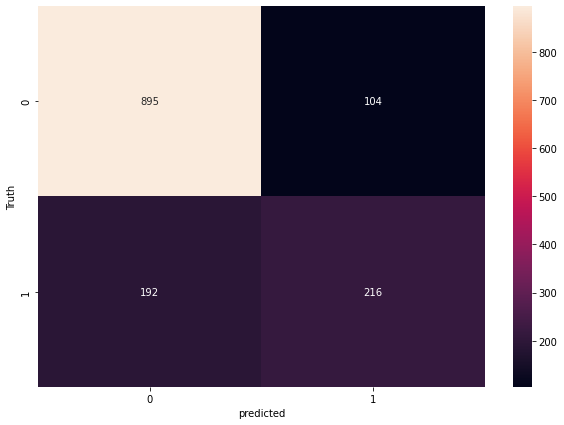

In [89]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True, fmt= 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [91]:
Y_test.shape

(1407,)

# Accuracy

In [93]:
round((895+216)/(895+216+104+192),2)

0.79

# Precision for 0 Class. i.e.,Precision for customers who did not churn

In [95]:
round(895/(895+192),2)

0.82

# Precision for Class 1. i.e.,Precision for customers who actually churned

In [96]:
round(216/(216+104),2)

0.68

# Recall for Class 0

In [97]:
round(895/(895+104),2)

0.9

In [98]:
round(216/(216+192),2)

0.53